<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/Code_Numerical_Method/blob/master/Least_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$y = A + Bx + Cx^2$ , and that we would like to fit
this model to experimental data. 

In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

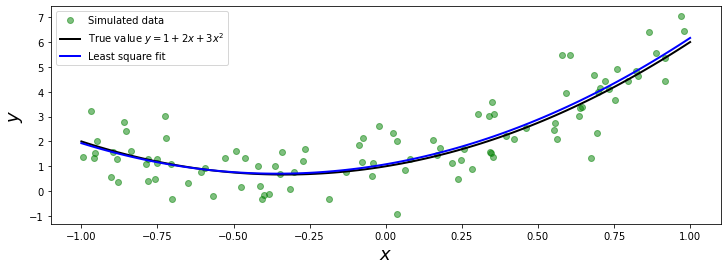

In [3]:
# simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m) 

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
sol, r, rank, s = la.lstsq(A.T, Y) 

y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4)) 

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)
